In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
from pandas.tools import plotting

In [4]:
import urllib.request

In [5]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/iris.txt'
urllib.request.urlretrieve(url, 'ayame.txt')

('ayame.txt', <http.client.HTTPMessage at 0x1074eb668>)

In [6]:
df = pd.read_csv('ayame.txt', sep='\t', index_col=0) 

In [7]:
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


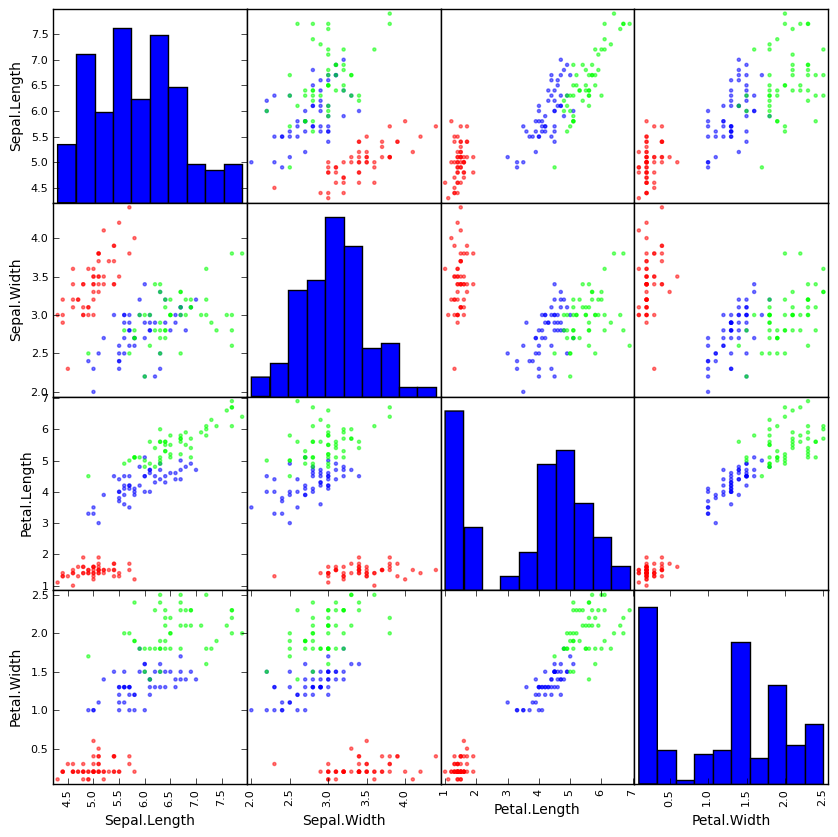

In [8]:
color_codes = ["#FF0000", "#0000FF", "#00FF00"]
class_names = list(set(df.iloc[:, -1]))
colors = [color_codes[class_names.index(x)] for x in list(df.iloc[:, -1])]
plotting.scatter_matrix(df.dropna(axis=1)[df.columns[:]], figsize=(10, 10), color=colors) 
plt.show()

綺麗に3つに分けることができた。  
Petal.WidthとPetal.Lengthには非常に強い正の相関がありそう。

In [9]:
print(pd.DataFrame(np.corrcoef(df.dropna().iloc[:, :-1].T.as_matrix().tolist()), 
             columns=df.columns[:-1], index=df.columns[:-1]))

              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.000000    -0.117570      0.871754     0.817941
Sepal.Width      -0.117570     1.000000     -0.428440    -0.366126
Petal.Length      0.871754    -0.428440      1.000000     0.962865
Petal.Width       0.817941    -0.366126      0.962865     1.000000


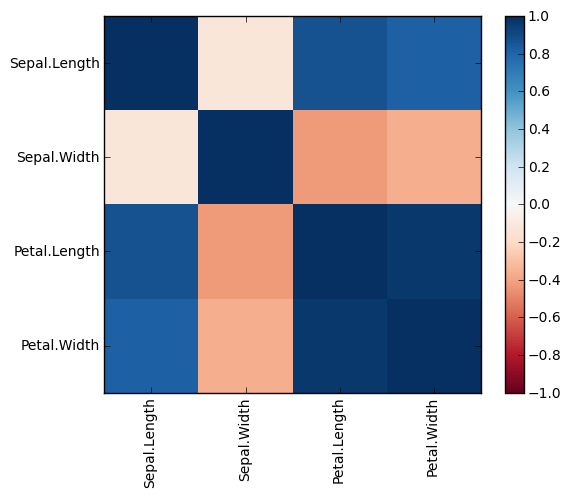

In [10]:
corrcoef = np.corrcoef(df.dropna().iloc[:, :-1].T.as_matrix().tolist())
plt.figure(figsize=(6, 5))
plt.imshow(corrcoef, interpolation='nearest', cmap=plt.cm.RdBu, vmin = -1, vmax = 1)
plt.colorbar()
tick_marks = np.arange(len(corrcoef))
plt.xticks(tick_marks, df.columns[:-1], rotation=90)
plt.yticks(tick_marks, df.columns[:-1])
plt.tight_layout()

Sepal.Widthは他の要素と相関係数が低いことがわかる。  
また残りの3要素はそれぞれ相関係数が高いことがわかる。 

続いてPCAによる分析を行う。

In [11]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [12]:
dfs = df.iloc[:, :-1].apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

In [13]:
dfs

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,-0.897674,1.015602,-1.335752,-1.311052
2,-1.139200,-0.131539,-1.335752,-1.311052
3,-1.380727,0.327318,-1.392399,-1.311052
4,-1.501490,0.097889,-1.279104,-1.311052
5,-1.018437,1.245030,-1.335752,-1.311052
6,-0.535384,1.933315,-1.165809,-1.048667
7,-1.501490,0.786174,-1.335752,-1.179859
8,-1.018437,0.786174,-1.279104,-1.311052
9,-1.743017,-0.360967,-1.335752,-1.311052
10,-1.139200,0.097889,-1.279104,-1.442245


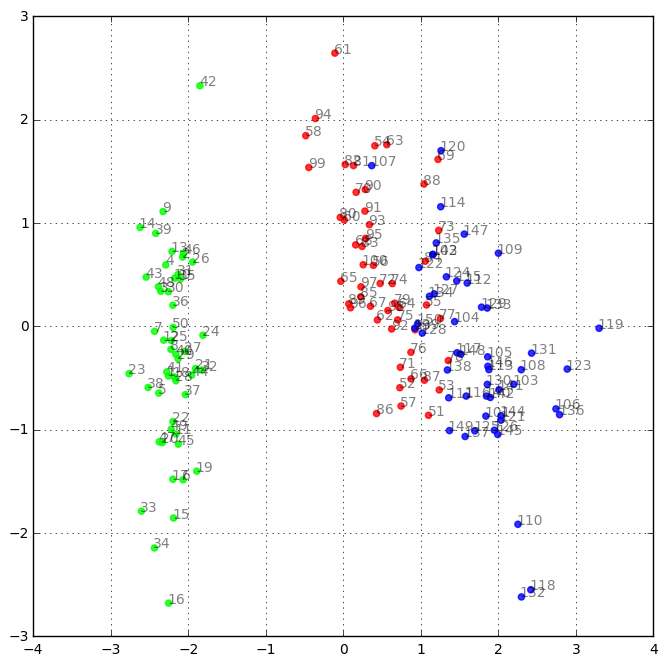

In [14]:
color_codes = ["#FF0000", "#0000FF", "#00FF00"]
class_names = list(set(df.iloc[:, -1]))
colors = [color_codes[class_names.index(x)] for x in list(df.iloc[:, -1])]
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, color=colors)
plt.grid()
plt.show()

第一成分によって3種類のあやめが綺麗に分かれていることがわかる。  
しかし、versicolorとverginicaの識別が少し難しそうである。

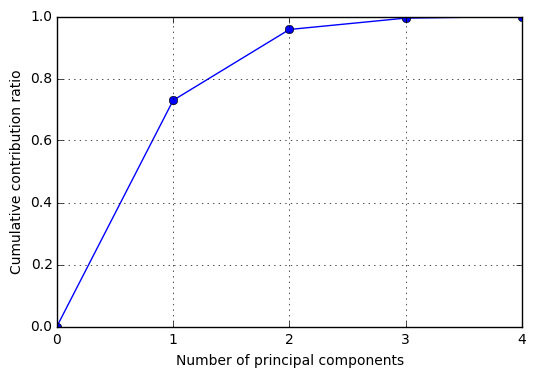

In [15]:
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

累積寄与率を見ると、2つの成分であやめをほぼ表現することができることがわかる。  
元データを見ると、明らかにsetosaのみPetalのサイズが小さいことがわかり、これが第一成分であると予測できる。また、versicolorのPetalサイズもvirginicaと比べて少し低めになっていることも第一成分による分離と一致している。  


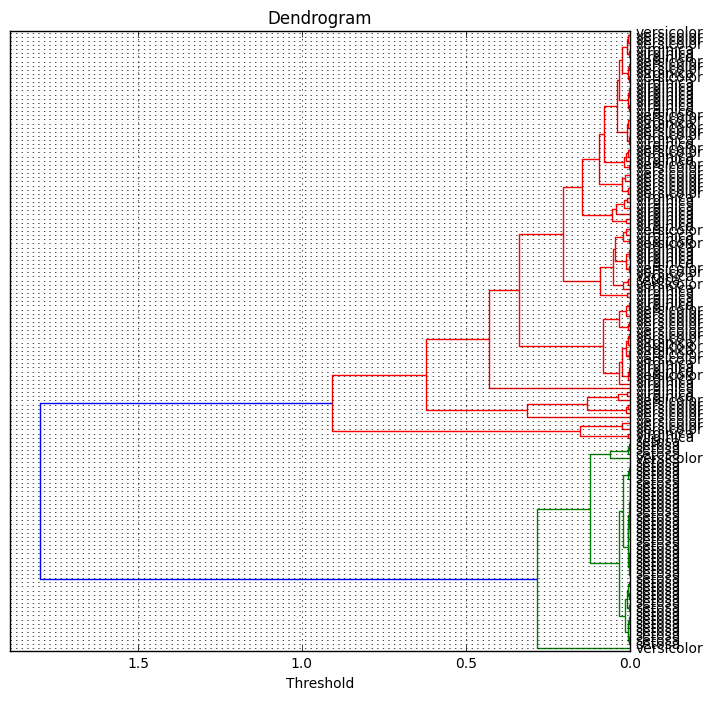

In [35]:
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(dfs.iloc[:, :], metric = 'correlation',method = 'average')
plt.figure(figsize=(8, 8))
label = [""] * len(df.index)
dendrogram(result1, orientation='right', labels=list(df.iloc[:,4]),  color_threshold=1.0
          )
plt.title("Dendrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()

階層的クラスタリングではversicolorとvirginicaの判別はできなさそう。  
setosaはある程度綺麗に分けられている。